In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:95% !important}</style>"))
display(HTML("<style>.output_result {width:95% !important}</style>"))

In [2]:
import pandas as pd
print(pd.__version__)

1.0.0


In [3]:
#!conda install qgrid
#import qgrid

In [4]:
import copy as cp

In [5]:
#!conda install seaborn
import seaborn as sns

In [6]:
%matplotlib inline

In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
import os
os.getcwd()

'/home/rajkumar/linux-work/Analysis-Understanding/Sandman-Baselined-27-Dec-2019/scripts'

## Data import

In [307]:
# !conda install xlrd
#prepSand = pd.read_excel("../data/Nelcast-2/Nelcast_Gudur_disa70_Preparedsand_01-Jan-2019_TO_31-Dec-2019_DISA FLEX 70.xlsx", skiprows=[0,1,2,3,4])

# brakes validation 
#prepSand = pd.read_excel("../data/Validation-data/Brakes_Preparedsand_01-Jul-2019_TO_31-Dec-2019_Line E.xlsx", skiprows=[0,1,2,3,4])

# Munjal validation
prepSand = pd.read_excel("../data/Validation-data/Munjal-Preparedsand_01-Apr-2019_TO_31-Jan-2020_Disa 231Y.xlsx", skiprows=[0,1,2,3,4])

# Nelcast ponneri HPML validation
#prepSand = pd.read_excel("../data/Validation-data/Nelcast_ponneri_Preparedsand_01-Jul-2019_TO_31-Dec-2019_HPML (KW).xlsx", skiprows=[0,1,2,3,4])



In [308]:
print(prepSand.shape)
prepSand.head()

(2298, 29)


,Date,Time,Shift,Heat No.,Component Id,GCS (kg/cm2),Compactability (%),Active Clay (%),Wet Tensile Strength (gm/cm2),LOI (%),...,Volatile Combustible Matter - VCM (%),Friability Index (%),GFN/AFS (no),Oolitics (%),Cone Jolt Test (no),Temp. of Sand before mix.(C),Temp. of Sand after mix.(C),Ambient Temperature (C),Relative Humidity (%),Split Strength (psi)
0,2019-04-01,10:20,A,9D01A,Disc FR Brake _XBA,1.78,36.0,8.5,16.0,2.6,...,NaN,NaN,66.94,NaN,NaN,NaN,38.0,30.53,15.0,NaN
1,2019-04-01,12:35,A,9D01A,Disk FR Brake - Model L YAD / YBA,1.86,36.0,8.5,8.0,2.6,...,NaN,NaN,66.94,NaN,NaN,NaN,38.0,34.92,15.0,NaN
2,2019-04-01,13:30,A,9D01A,"Disc, Front Brake,YL8",1.86,36.0,8.5,8.0,2.6,...,NaN,NaN,66.94,NaN,NaN,NaN,38.0,36.19,15.0,NaN
3,2019-04-01,14:40,B,9D01A,Cylinder Block _ CMA,1.84,36.0,8.5,14.0,2.6,...,NaN,NaN,66.94,NaN,NaN,NaN,41.0,36.74,15.0,NaN
4,2019-04-01,15:30,B,9D01B,Cylinder Block _ CMA,1.84,36.0,8.5,14.0,2.6,...,NaN,NaN,66.94,NaN,NaN,NaN,41.0,36.88,15.0,NaN


In [309]:
prepSand.dropna(axis=1, how='all', inplace=True)

In [310]:
print(prepSand.shape)
prepSand.head()

(2298, 20)


,Date,Time,Shift,Heat No.,Component Id,GCS (kg/cm2),Compactability (%),Active Clay (%),Wet Tensile Strength (gm/cm2),LOI (%),Moisture (%),Total Clay (%),Inert Fines (%),Volatile Matter (%),Specimen Weight (gm),Permeability (no),GFN/AFS (no),Temp. of Sand after mix.(C),Ambient Temperature (C),Relative Humidity (%)
0,2019-04-01,10:20,A,9D01A,Disc FR Brake _XBA,1.78,36.0,8.5,16.0,2.6,2.77,11.1,2.6,2.64,146.0,120.0,66.94,38.0,30.53,15.0
1,2019-04-01,12:35,A,9D01A,Disk FR Brake - Model L YAD / YBA,1.86,36.0,8.5,8.0,2.6,2.64,11.1,2.6,2.64,146.0,120.0,66.94,38.0,34.92,15.0
2,2019-04-01,13:30,A,9D01A,"Disc, Front Brake,YL8",1.86,36.0,8.5,8.0,2.6,2.64,11.1,2.6,2.64,146.0,120.0,66.94,38.0,36.19,15.0
3,2019-04-01,14:40,B,9D01A,Cylinder Block _ CMA,1.84,36.0,8.5,14.0,2.6,2.66,11.1,2.6,2.64,146.0,115.0,66.94,41.0,36.74,15.0
4,2019-04-01,15:30,B,9D01B,Cylinder Block _ CMA,1.84,36.0,8.5,14.0,2.6,2.66,11.1,2.6,2.64,146.0,115.0,66.94,41.0,36.88,15.0


In [311]:
#qgrid.show_grid(prepSand)

In [357]:
#rejection = pd.read_excel("../data/Nelcast-2/Nelcast_Gudur_disa70_Rejection_01-Jan-2019_TO_31-Dec-2019_DISA FLEX 70.xlsx", skiprows=[0,1,2,3,4])

# brakes validation
#rejection = pd.read_excel("../data/Validation-data/Brakes_Rejection_01-Jul-2019_TO_31-Dec-2019_Line E.xlsx", skiprows=[0,1,2,3,4])

# Munjal validation
rejection = pd.read_excel("../data/Validation-data/Munjal-Rejection_01-Apr-2019_TO_31-Jan-2020_Disa 231Y.xlsx", skiprows=[0,1,2,3,4])


# Nelcast ponneri HPML validation
#rejection = pd.read_excel("../data/Validation-data/Nelcast_ponneri_Rejection_01-Jul-2019_TO_31-Dec-2019_HPML (KW).xlsx", skiprows=[0,1,2,3,4])


In [358]:
print(rejection.shape)
rejection.head()

(2517, 88)


,Production Date,Shift,Heat No.,Component Id,No. of Boxes Poured (No),No. of Castings Per Box (No),Nett Casting Wt (Kg),Total Quantity Produced (no),Total Sand Rejection Quantity (no),Total Castings Salvaged (no),...,Knock Out Damage (no),Ingate Breakage (no),Decoring Damage (no),Unclean (no),Mould Press (no),Other Defects 1 (no),Other Defects 2 (no),Other Defects 3 (no),Other Defects 4 (no),Other Defects 5 (no)
0,2019-04-01,A,9D01A,Disc FR Brake _XBA,479,4,4.08,1916,43,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-04-01,A,9D01A,Disk FR Brake - Model L YAD / YBA,500,2,8.59,1000,77,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-04-01,A,9D01A,"Disc, Front Brake,YL8",556,2,7.67,1112,25,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-04-01,B,9D01A,Cylinder Block _ CMA,18,10,1.59,180,69,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-04-01,B,9D01B,Cylinder Block _ CMA,193,10,1.59,1930,166,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [359]:
rejection = rejection[["Production Date", #"Shift", "Heat No.", "Nett Casting Wt (Kg)", 
                       "Total Quantity Produced (no)","Total Sand Rejection Quantity (no)" ]]

In [360]:
rejection.head()

,Production Date,Total Quantity Produced (no),Total Sand Rejection Quantity (no)
0,2019-04-01,1916,43
1,2019-04-01,1000,77
2,2019-04-01,1112,25
3,2019-04-01,180,69
4,2019-04-01,1930,166


In [361]:
rejection = rejection.groupby("Production Date").sum()

In [362]:
rejection.head()

,Total Quantity Produced (no),Total Sand Rejection Quantity (no)
Production Date,,
2019-04-01,23043,593
2019-04-02,16370,257
2019-04-03,24724,642
2019-04-04,16835,355
2019-04-05,16384,355


In [363]:
rejection["Rejection (%)"] = 100*rejection["Total Sand Rejection Quantity (no)"]/rejection["Total Quantity Produced (no)"]

In [364]:
rejection["1 Nov 2019":]

,Total Quantity Produced (no),Total Sand Rejection Quantity (no),Rejection (%)
Production Date,,,
2019-11-04,19374,464,2.394962
2019-11-05,16683,324,1.942097
2019-11-06,30078,958,3.185052
2019-11-07,16035,312,1.945744
2019-11-08,16916,326,1.927170
...,...,...,...
2020-01-24,18545,670,3.612834
2020-01-25,2925,224,7.658120
2020-01-28,17106,768,4.489653


In [365]:
rejection[rejection["Rejection (%)"] > 100]

,Total Quantity Produced (no),Total Sand Rejection Quantity (no),Rejection (%)
Production Date,,,


In [366]:
prepSand.columns, prepSand.shape

(Index(['GCS (kg/cm2)', 'Compactability (%)', 'Active Clay (%)',
        'Wet Tensile Strength (gm/cm2)', 'LOI (%)', 'Moisture (%)',
        'Inert Fines (%)', 'Volatile Matter (%)', 'Specimen Weight (gm)',
        'Permeability (no)', 'GFN/AFS (no)', 'Temp. of Sand after mix.(C)'],
       dtype='object'), (197, 12))

In [368]:
#cols = ["GCS (gm/cm2)", "Compactability (no)", "Active Clay (%)", "Wet Tensile Strength (gm/cm2)", "LOI (%)", "Moisture (%)", "Inert Fines (%)", "Volatile Matter (%)", "Permeability (no)", "Shear Strength (gm/cm2)", "pH Value (no)", "GFN/AFS (no)"]
#cols = ["GCS (gm/cm2)", "Compactability (%)", "Active Clay (%)", "Wet Tensile Strength (gm/cm2)", "LOI (%)", "Moisture (%)", "Inert Fines (%)",  "Permeability (no)", "Shatter Index No. (No)"]

# brakes validation
# cols = ["GCS (gm/cm2)", "Compactability (%)", "Active Clay (%)", "Wet Tensile Strength (gm/cm2)", "LOI (%)", "Moisture (%)", "Inert Fines (%)",  "Permeability (no)", 'Shear Strength (gm/cm2)']

# munjal validation
cols = ['GCS (kg/cm2)', 'Compactability (%)', 'Active Clay (%)',
        'Wet Tensile Strength (gm/cm2)', 'LOI (%)', 'Moisture (%)',
        'Inert Fines (%)', 'Volatile Matter (%)', 
        'Permeability (no)', 'GFN/AFS (no)', 'Temp. of Sand after mix.(C)']

# Nelcast ponneri validation
# cols = ['GCS (gm/cm2)',
#         'Compactability (%)', 'Active Clay (%)',
#         'Wet Tensile Strength (gm/cm2)', 'LOI (%)', 'Moisture (%)',
#         'Inert Fines (%)',
#         'Permeability (no)', 'Shear Strength (gm/cm2)',
#         ]

prepSand = prepSand.groupby("Date").mean()[cols]

In [369]:
#startDay = "1 Jan 2019"

In [370]:
#prepSand = prepSand[startDay:]

In [371]:
#rejection = rejection[startDay:]

In [372]:
totData = prepSand.join(rejection["Rejection (%)"])

In [373]:
print(totData.shape)

(197, 12)


In [374]:
totData.head()

,GCS (kg/cm2),Compactability (%),Active Clay (%),Wet Tensile Strength (gm/cm2),LOI (%),Moisture (%),Inert Fines (%),Volatile Matter (%),Permeability (no),GFN/AFS (no),Temp. of Sand after mix.(C),Rejection (%)
Date,,,,,,,,,,,,
2019-04-01,1.657895,36.210526,8.50,10.863158,2.60,2.675789,2.60,2.64,122.894737,66.94,39.842105,2.573450
2019-04-02,1.659231,36.615385,8.50,10.461538,2.62,2.710000,2.58,2.62,130.000000,66.90,41.076923,1.569945
2019-04-03,1.726923,36.692308,8.38,11.846154,2.55,2.691538,2.67,2.65,126.153846,68.02,41.538462,2.596667
2019-04-04,1.719231,37.769231,8.38,11.053846,2.62,2.796923,2.66,2.60,126.538462,65.97,39.923077,2.108702
2019-04-05,1.737692,36.538462,8.50,9.807692,2.60,2.703846,2.60,2.59,123.461538,65.82,41.538462,2.166748


In [375]:
totData.describe()

,GCS (kg/cm2),Compactability (%),Active Clay (%),Wet Tensile Strength (gm/cm2),LOI (%),Moisture (%),Inert Fines (%),Volatile Matter (%),Permeability (no),GFN/AFS (no),Temp. of Sand after mix.(C),Rejection (%)
count,197.000000,197.000000,196.000000,197.000000,196.000000,197.000000,196.000000,196.000000,197.000000,196.000000,197.000000,197.000000
mean,1.676577,40.163355,8.540924,12.357843,2.765189,2.909187,2.436720,2.581548,131.516460,68.877715,41.473421,2.596404
std,0.081832,2.115509,0.232623,1.624480,0.153943,0.116047,0.202617,0.125573,6.766247,1.369998,2.430779,1.061451
min,1.519000,36.000000,8.110000,8.240000,2.453333,2.675789,2.003333,2.256667,116.111111,64.850000,33.545455,0.000000
25%,1.613846,38.500000,8.379167,11.354545,2.640000,2.804167,2.265833,2.493958,126.250000,68.705000,40.000000,1.978595
50%,1.662500,40.818182,8.530000,12.316667,2.735000,2.945000,2.460000,2.600000,130.416667,69.445000,42.133333,2.438274
75%,1.723846,41.666667,8.700000,13.430769,2.865000,2.999167,2.600000,2.662500,136.250000,69.735000,43.333333,3.048881
max,1.960769,43.750000,9.036667,16.728571,3.276667,3.183571,2.900000,2.873333,150.416667,70.300000,44.833333,7.745350


## Data cleaning

In [376]:
totData.isnull().any()

GCS (kg/cm2)                     False
Compactability (%)               False
Active Clay (%)                   True
Wet Tensile Strength (gm/cm2)    False
LOI (%)                           True
Moisture (%)                     False
Inert Fines (%)                   True
Volatile Matter (%)               True
Permeability (no)                False
GFN/AFS (no)                      True
Temp. of Sand after mix.(C)      False
Rejection (%)                    False
dtype: bool

In [377]:
totData[totData.isnull().any(axis=1)]

,GCS (kg/cm2),Compactability (%),Active Clay (%),Wet Tensile Strength (gm/cm2),LOI (%),Moisture (%),Inert Fines (%),Volatile Matter (%),Permeability (no),GFN/AFS (no),Temp. of Sand after mix.(C),Rejection (%)
Date,,,,,,,,,,,,
2019-11-23,1.93,39.0,NaN,14.0,NaN,2.8,NaN,NaN,133.0,NaN,42.0,3.289058


### 1. Remove rows with Rejection data absent

- Himanshu rather shared to treat it as zero, actually we simply don't have data for that day

**Drop the data on 19 October then**

In [378]:
totData = totData[pd.np.isfinite(totData["Rejection (%)"])]

/home/rajkumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


In [379]:
totData.shape

(197, 12)

In [384]:
totData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197 entries, 2019-04-01 to 2020-01-30
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   GCS (kg/cm2)                   197 non-null    float64
 1   Compactability (%)             197 non-null    float64
 2   Active Clay (%)                196 non-null    float64
 3   Wet Tensile Strength (gm/cm2)  197 non-null    float64
 4   LOI (%)                        196 non-null    float64
 5   Moisture (%)                   197 non-null    float64
 6   Inert Fines (%)                196 non-null    float64
 7   Volatile Matter (%)            196 non-null    float64
 8   Permeability (no)              197 non-null    float64
 9   GFN/AFS (no)                   196 non-null    float64
 10  Temp. of Sand after mix.(C)    197 non-null    float64
 11  Rejection (%)                  197 non-null    float64
dtypes: float64(12)
memory usage: 20

In [380]:
totData.isnull().any()

GCS (kg/cm2)                     False
Compactability (%)               False
Active Clay (%)                   True
Wet Tensile Strength (gm/cm2)    False
LOI (%)                           True
Moisture (%)                     False
Inert Fines (%)                   True
Volatile Matter (%)               True
Permeability (no)                False
GFN/AFS (no)                      True
Temp. of Sand after mix.(C)      False
Rejection (%)                    False
dtype: bool

**All data is fine**

## Model building

In [381]:
import sys
import os
basepath = os.path.dirname('__file__')
filepath = os.path.abspath("..")
datapath = filepath + "/data"
srcpath = filepath + "/src"
#print (filepath)
if filepath not in sys.path:
    sys.path.append(filepath)
if srcpath not in sys.path:
    sys.path.append(srcpath)

In [382]:
from classStruct.model import model

In [383]:
Model1 = model(totData,cols,['Rejection (%)'])

LinAlgError: SVD did not converge

In [297]:
Model1.optimalClusterRejectionSeries

Predicted Rejection (%)    3.270925
dtype: float64

In [298]:
clustSet = pd.DataFrame([C.clusterCenter for C in Model1.clustersList])
clustSet

,GCS (gm/cm2),Compactability (%),Active Clay (%),Wet Tensile Strength (gm/cm2),LOI (%),Moisture (%),Inert Fines (%),Permeability (no),Shear Strength (gm/cm2)
0,0.692497,0.518503,0.359457,0.485919,0.389789,0.361808,0.533770,0.435623,0.454340
1,0.627868,0.602155,0.395674,0.669577,0.371629,0.488454,0.317488,0.710396,0.445841


In [299]:
clustSet.columns.values

array(['GCS (gm/cm2)', 'Compactability (%)', 'Active Clay (%)',
       'Wet Tensile Strength (gm/cm2)', 'LOI (%)', 'Moisture (%)',
       'Inert Fines (%)', 'Permeability (no)', 'Shear Strength (gm/cm2)'],
      dtype=object)

In [300]:
# col_list = ['GCS (gm/cm2)', 'Compactability (%)', 'Active Clay (%)',
#        'Wet Tensile Strength (gm/cm2)', 'LOI (%)', 'Moisture (%)',
#        'Inert Fines (%)', 'Permeability (no)', 'Shatter Index No. (No)']

# brakes validation
col_list = ['GCS (gm/cm2)', 'Compactability (%)', 'Active Clay (%)',
       'Wet Tensile Strength (gm/cm2)', 'LOI (%)', 'Moisture (%)',
       'Inert Fines (%)', 'Permeability (no)', 'Shear Strength (gm/cm2)']

# munjal validation
# col_list = ['GCS (gm/cm2)',
#         'Compactability (%)', 'Active Clay (%)',
#         'Wet Tensile Strength (gm/cm2)', 'LOI (%)', 'Moisture (%)',
#         'Inert Fines (%)',
#         'Permeability (no)', 'Shear Strength (gm/cm2)',
#         ]

# Nelcast ponneri HPML validation
# col_list = ['GCS (gm/cm2)',
#         'Compactability (%)', 'Active Clay (%)',
#         'Wet Tensile Strength (gm/cm2)', 'LOI (%)', 'Moisture (%)',
#         'Inert Fines (%)',
#         'Permeability (no)', 'Shear Strength (gm/cm2)',
#         ]

print(col_list)

['GCS (gm/cm2)', 'Compactability (%)', 'Active Clay (%)', 'Wet Tensile Strength (gm/cm2)', 'LOI (%)', 'Moisture (%)', 'Inert Fines (%)', 'Permeability (no)', 'Shear Strength (gm/cm2)']


In [301]:
Model1.deNormalizeColumns(col_list, clustSet)

,GCS (gm/cm2),Compactability (%),Active Clay (%),Wet Tensile Strength (gm/cm2),LOI (%),Moisture (%),Inert Fines (%),Permeability (no),Shear Strength (gm/cm2)
0,2648.265299,39.476805,10.219852,26.969895,4.390100,3.277082,3.311888,106.825341,562.089620
1,2633.930273,40.102269,10.227646,27.645144,4.384349,3.312814,3.257097,112.265843,561.567331


In [302]:
for C in Model1.clustersList:
    print(len(C.rowIdList))

73
61


In [303]:
Model1.predictor(clustSet, ["Rejection (%)"], Normalize=False)

In [304]:
Model1.deNormalizeColumns(col_list, clustSet).to_csv("Predicted_optimal.csv")
Model1.deNormalizeColumns(col_list, clustSet)

,GCS (gm/cm2),Compactability (%),Active Clay (%),Wet Tensile Strength (gm/cm2),LOI (%),Moisture (%),Inert Fines (%),Permeability (no),Shear Strength (gm/cm2),Predicted Rejection (%),predictionConfidence
0,2648.265299,39.476805,10.219852,26.969895,4.390100,3.277082,3.311888,106.825341,562.089620,3.295449,100.0
1,2633.930273,40.102269,10.227646,27.645144,4.384349,3.312814,3.257097,112.265843,561.567331,3.270925,100.0


In [305]:
oldHighInf = pd.Series({"Permeability (no)":-0.166876,
"GCS (gm/cm2)":-0.083704,
"Moisture (%)":-0.065291,
"LOI (%)":-0.061617,
"Volatile Matter (%)":-0.049068,
"Inert Fines (%)":-0.032386,
"GFN/AFS (no)":-0.001599,
"Shear Strength (gm/cm2)":0.011389,
"Active Clay (%)":0.014865,
"pH Value (no)":0.040148,
"Wet Tensile Strength (gm/cm2)":0.041391,
"Compactability (no)": 0.131178})
oldHighInf.sort_values()

Permeability (no)               -0.166876
GCS (gm/cm2)                    -0.083704
Moisture (%)                    -0.065291
LOI (%)                         -0.061617
Volatile Matter (%)             -0.049068
Inert Fines (%)                 -0.032386
GFN/AFS (no)                    -0.001599
Shear Strength (gm/cm2)          0.011389
Active Clay (%)                  0.014865
pH Value (no)                    0.040148
Wet Tensile Strength (gm/cm2)    0.041391
Compactability (no)              0.131178
dtype: float64

In [306]:
newHighInf = Model1.computeHighlyFluencingInputs(totData.iloc[-1],"Rejection (%)")
newHighInf.to_csv("New_High_Influnce_params.csv", header=False)
Model1.deNormalizeColumns(col_list, newHighInf)

Permeability (no)                 108.737072
GCS (gm/cm2)                     2590.288312
Active Clay (%)                    10.227920
Wet Tensile Strength (gm/cm2)      26.269555
Shear Strength (gm/cm2)           548.762601
LOI (%)                             4.288893
Compactability (%)                 36.112027
Inert Fines (%)                     3.193291
Moisture (%)                        3.183665
dtype: float64

In [207]:
Model1.highInfChange(totData.iloc[-1],"Rejection (%)")

,GCS (gm/cm2),Shear Strength (gm/cm2)
1,-146.641525,-43.308864


In [97]:
totDataCp = cp.deepcopy(totData)

In [98]:
totData.tail()

,GCS (gm/cm2),Compactability (%),Active Clay (%),Wet Tensile Strength (gm/cm2),LOI (%),Moisture (%),Inert Fines (%),Permeability (no),Shear Strength (gm/cm2),Rejection (%)
Date,,,,,,,,,,
2019-12-25,2665.000000,39.714286,10.220714,26.485714,4.366667,3.282857,3.293333,99.428571,565.000000,5.585307
2019-12-26,2661.666667,39.666667,10.236667,26.400000,4.395000,3.310833,3.293333,103.666667,560.000000,4.421813
2019-12-27,2673.333333,39.066667,10.224000,26.486667,4.390000,3.274667,3.356667,98.200000,564.666667,5.063291
2019-12-30,2688.571429,40.000000,10.260000,26.600000,4.401667,3.276429,3.270000,100.714286,584.285714,4.584903
2019-12-31,2689.285714,39.500000,10.264286,26.750000,4.413333,3.270000,3.280000,102.214286,588.571429,2.316393


In [99]:
Model1.predictor(totDataCp, ["Rejection (%)"], Normalize=True)

In [100]:
totDataCp.tail()

,GCS (gm/cm2),Compactability (%),Active Clay (%),Wet Tensile Strength (gm/cm2),LOI (%),Moisture (%),Inert Fines (%),Permeability (no),Shear Strength (gm/cm2),Rejection (%),Predicted Rejection (%),predictionConfidence
Date,,,,,,,,,,,,
2019-12-25,2665.000000,39.714286,10.220714,26.485714,4.366667,3.282857,3.293333,99.428571,565.000000,5.585307,3.872087,58.458838
2019-12-26,2661.666667,39.666667,10.236667,26.400000,4.395000,3.310833,3.293333,103.666667,560.000000,4.421813,3.452921,72.856094
2019-12-27,2673.333333,39.066667,10.224000,26.486667,4.390000,3.274667,3.356667,98.200000,564.666667,5.063291,3.697238,38.622286
2019-12-30,2688.571429,40.000000,10.260000,26.600000,4.401667,3.276429,3.270000,100.714286,584.285714,4.584903,3.433590,47.205547
2019-12-31,2689.285714,39.500000,10.264286,26.750000,4.413333,3.270000,3.280000,102.214286,588.571429,2.316393,3.255746,44.503275


In [101]:
totDataCp.predictionConfidence.describe()

count    134.000000
mean      47.010569
std       17.653799
min        0.000000
25%       37.028499
50%       49.566006
75%       59.950444
max       78.231961
Name: predictionConfidence, dtype: float64

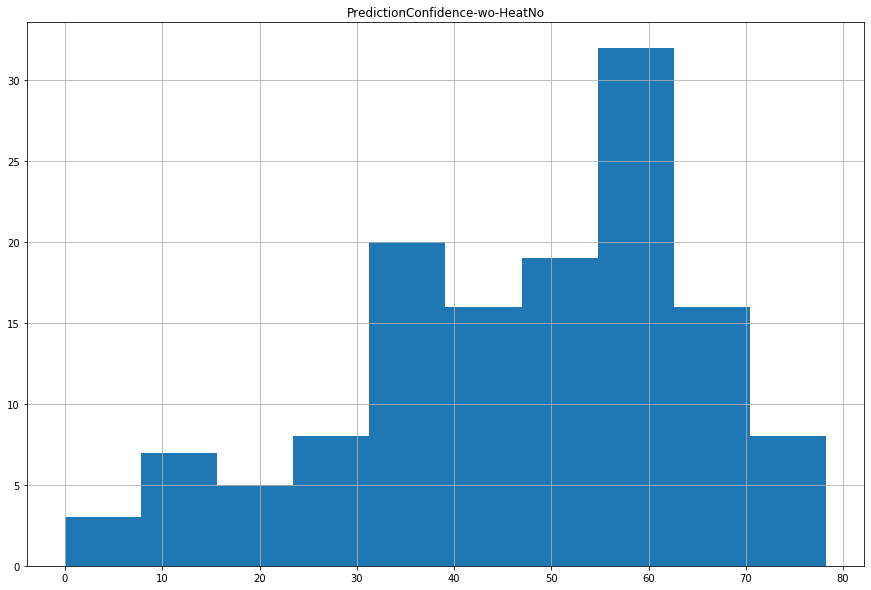

In [102]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
totDataCp.predictionConfidence.hist()
plt.title("PredictionConfidence-wo-HeatNo")
plt.savefig("PredictionConfidence-wo-HeatNo.png", bbox_inches='tight', dpi=300)
plt.show()